## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
!python get_data.py

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('All_election_results.csv', index_col=0)
df.head()

,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,ТИК
УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120,Территориальная_избирательная_комиссия_№1
УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46,Территориальная_избирательная_комиссия_№1
УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96,Территориальная_избирательная_комиссия_№1
УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71,Территориальная_избирательная_комиссия_№1
УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82,Территориальная_избирательная_комиссия_№1


In [3]:
voters_all = df.groupby(by='ТИК').sum()['Число избирателей, внесенных в список избирателей на момент окончания голосования']
bulletins = ['Число недействительных избирательных бюллетеней',	'Число действительных избирательных бюллетеней']
bulletin_all = df.groupby(by='ТИК').sum()[bulletins]
bulletin_all = bulletin_all.sum(axis=1)
turnout = bulletin_all / voters_all * 100
turnout = turnout.rename('Явка по ТИК в процентах')
turnout.sort_values(ascending=False)

ТИК
Территориальная_избирательная_комиссия_№18    50.738082
Территориальная_избирательная_комиссия_№15    40.007388
Территориальная_избирательная_комиссия_№13    39.645501
Территориальная_избирательная_комиссия_№19    37.665543
Территориальная_избирательная_комиссия_№8     36.005571
Территориальная_избирательная_комиссия_№20    33.709120
Территориальная_избирательная_комиссия_№9     33.263883
Территориальная_избирательная_комиссия_№22    32.372744
Территориальная_избирательная_комиссия_№30    31.965363
Территориальная_избирательная_комиссия_№2     31.659354
Территориальная_избирательная_комиссия_№1     31.302246
Территориальная_избирательная_комиссия_№10    30.476680
Территориальная_избирательная_комиссия_№29    30.418908
Территориальная_избирательная_комиссия_№4     30.332360
Территориальная_избирательная_комиссия_№21    29.082799
Территориальная_избирательная_комиссия_№7     28.931738
Территориальная_избирательная_комиссия_№25    28.858547
Территориальная_избирательная_комиссия_№17  

,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,ТИК,Территориальная_избирательная_комиссия_№1,Территориальная_избирательная_комиссия_№10,Территориальная_избирательная_комиссия_№11,Территориальная_избирательная_комиссия_№12,Территориальная_избирательная_комиссия_№13,Территориальная_избирательная_комиссия_№14,Территориальная_избирательная_комиссия_№15,Территориальная_избирательная_комиссия_№16,Территориальная_избирательная_комиссия_№17,Территориальная_избирательная_комиссия_№18,Территориальная_избирательная_комиссия_№19,Территориальная_избирательная_комиссия_№2,Территориальная_избирательная_комиссия_№20,Территориальная_избирательная_комиссия_№21,Территориальная_избирательная_комиссия_№22,Территориальная_избирательная_комиссия_№23,Территориальная_избирательная_комиссия_№24,Территориальная_избирательная_комиссия_№25,Территориальная_избирательная_комиссия_№26,Территориальная_избирательная_комиссия_№27,Территориальная_избирательная_комиссия_№28,Территориальная_избирательная_комиссия_№29,Территориальная_избирательная_комиссия_№3,Территориальная_избирательная_комиссия_№30,Территориальная_избирательная_комиссия_№4,Территориальная_избирательная_комиссия_№5,Территориальная_избирательная_комиссия_№6,Территориальная_избирательная_комиссия_№7,Территориальная_избирательная_комиссия_№8,Территориальная_избирательная_комиссия_№9
УИК №1,1803.0,1200.0,587.0,11.0,602.0,11.0,587.0,23.0,575.0,0.0,0.0,110.0,345.0,120.0,Территориальная_избирательная_комиссия_№1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
УИК №2,1466.0,1100.0,433.0,14.0,653.0,14.0,430.0,19.0,425.0,0.0,0.0,53.0,326.0,46.0,Территориальная_избирательная_комиссия_№1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
УИК №3,2092.0,1600.0,576.0,22.0,1002.0,22.0,576.0,15.0,583.0,0.0,0.0,155.0,332.0,96.0,Территориальная_избирательная_комиссия_№1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
УИК №4,1056.0,1000.0,318.0,4.0,678.0,4.0,318.0,13.0,309.0,0.0,0.0,67.0,171.0,71.0,Территориальная_избирательная_комиссия_№1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
УИК №5,1827.0,1400.0,495.0,8.0,897.0,8.0,493.0,16.0,485.0,0.0,0.0,137.0,266.0,82.0,Территориальная_избирательная_комиссия_№1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
УИК №2351,132.0,150.0,86.0,27.0,37.0,27.0,86.0,2.0,111.0,0.0,0.0,7.0,91.0,13.0,Территориальная_избирательная_комиссия_№30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
УИК №2352,320.0,350.0,217.0,23.0,110.0,23.0,217.0,4.0,236.0,0.0,0.0,20.0,193.0,23.0,Территориальная_избирательная_комиссия_№30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
candidat = 'Амосов Михаил Иванович'
df['Всего голосов'] = df[bulletins].sum(axis=1)
more_than_hundred_votes = df[df['Всего голосов'] > 100]
votes_per_candidat = more_than_hundred_votes[candidat]/more_than_hundred_votes['Всего голосов']
votes_per_candidat = votes_per_candidat.sort_values(ascending=False)
index_max_votes = votes_per_candidat.index[0]
max_votes = votes_per_candidat.loc[index_max_votes] * 100
print('Кандидат', candidat)
print('Максимальный процент голосов за кандидата - {:.2f} на участке - {}'.format(max_votes, index_max_votes))

Кандидат Амосов Михаил Иванович
Максимальный процент голосов за кандидата - 41.52 на участке - УИК №567


In [5]:
df['Явка'] = df['Всего голосов']/df['Число избирателей, внесенных в список избирателей на момент окончания голосования'] 
min_turnout = df.groupby('ТИК')['Явка'].min()
max_turnout = df.groupby('ТИК')['Явка'].max()
diff_turnout = max_turnout-min_turnout
diff_turnout_max = diff_turnout.max()
diff_turnout_max_tik_name = diff_turnout[diff_turnout == diff_turnout_max].index[0]
print('Максимальная разница между явками на участках - {:.2f} на участке {}'.format(diff_turnout_max*100,
                                                                                     diff_turnout_max_tik_name))

Максимальная разница между явками на участках - 82.04 на участке Территориальная_избирательная_комиссия_№17


In [6]:
std_turnout = df.groupby('ТИК')['Явка'].var()
std_turnout = std_turnout.rename('Выборочная дисперсия явки')

std_turnout

ТИК
Территориальная_избирательная_комиссия_№1     0.019176
Территориальная_избирательная_комиссия_№10    0.007428
Территориальная_избирательная_комиссия_№11    0.024049
Территориальная_избирательная_комиссия_№12    0.003220
Территориальная_избирательная_комиссия_№13    0.039352
Территориальная_избирательная_комиссия_№14    0.003146
Территориальная_избирательная_комиссия_№15    0.041623
Территориальная_избирательная_комиссия_№16    0.011306
Территориальная_избирательная_комиссия_№17    0.033070
Территориальная_избирательная_комиссия_№18    0.024045
Территориальная_избирательная_комиссия_№19    0.020498
Территориальная_избирательная_комиссия_№2     0.046172
Территориальная_избирательная_комиссия_№20    0.017360
Территориальная_избирательная_комиссия_№21    0.031005
Территориальная_избирательная_комиссия_№22    0.045146
Территориальная_избирательная_комиссия_№23    0.059075
Территориальная_избирательная_комиссия_№24    0.027265
Территориальная_избирательная_комиссия_№25    0.000844
Террит

In [7]:
candidats = ['Амосов Михаил Иванович',	'Беглов Александр Дмитриевич',	'Тихонова Надежда Геннадьевна']

for candidat in candidats:
    votes_per_candidat = (df[candidat]/df['Всего голосов']).round(2) * 100

    column_name = candidat + ' результат'
    df_ = df.copy()
    df_[column_name] = votes_per_candidat
    df_ = df_.reset_index()
    df_ = df_.groupby(column_name).count()['index']
    df_ = df_.rename('Результат в % - Количество УИК')
    print(df_)

Амосов Михаил Иванович результат
0.0       1
1.0       6
2.0       6
3.0       2
4.0      13
5.0      18
6.0      25
7.0      35
8.0      48
9.0      68
10.0     89
11.0    100
12.0    117
13.0    130
14.0    131
15.0    160
16.0    153
17.0    152
18.0    126
19.0    102
20.0     89
21.0     82
22.0     77
23.0     44
24.0     56
25.0     40
26.0     45
27.0     26
28.0     26
29.0     17
30.0     15
31.0      5
32.0      6
33.0      4
34.0      1
35.0      3
36.0      2
42.0      1
Name: Результат в % - Количество УИК, dtype: int64
Беглов Александр Дмитриевич результат
30.0    1
32.0    1
33.0    2
38.0    3
39.0    3
       ..
93.0    1
94.0    3
95.0    2
96.0    1
98.0    2
Name: Результат в % - Количество УИК, Length: 63, dtype: int64
Тихонова Надежда Геннадьевна результат
0.0       2
1.0       4
2.0       5
3.0      11
4.0       9
5.0      15
6.0      21
7.0      22
8.0      35
9.0      45
10.0     47
11.0     52
12.0     67
13.0     78
14.0    117
15.0    145
16.0    217
17.0  

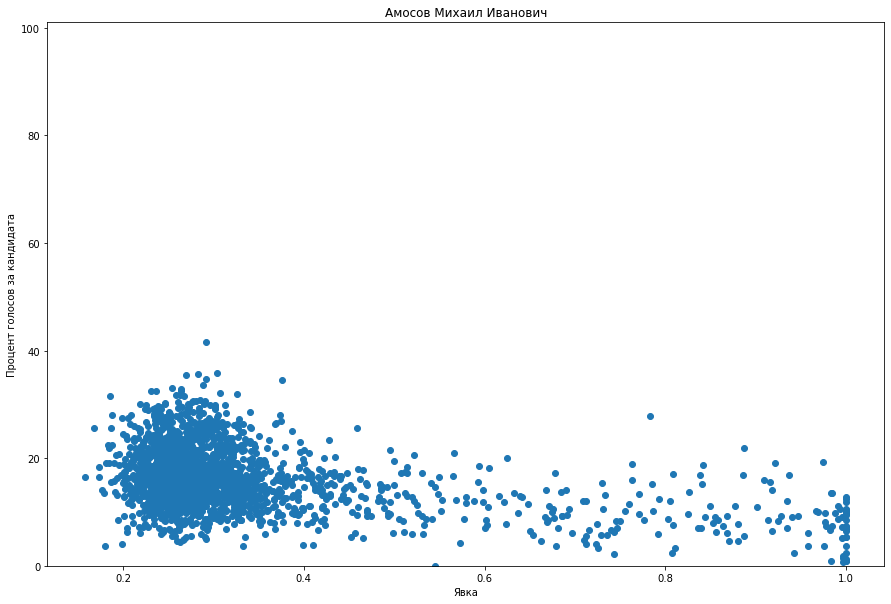

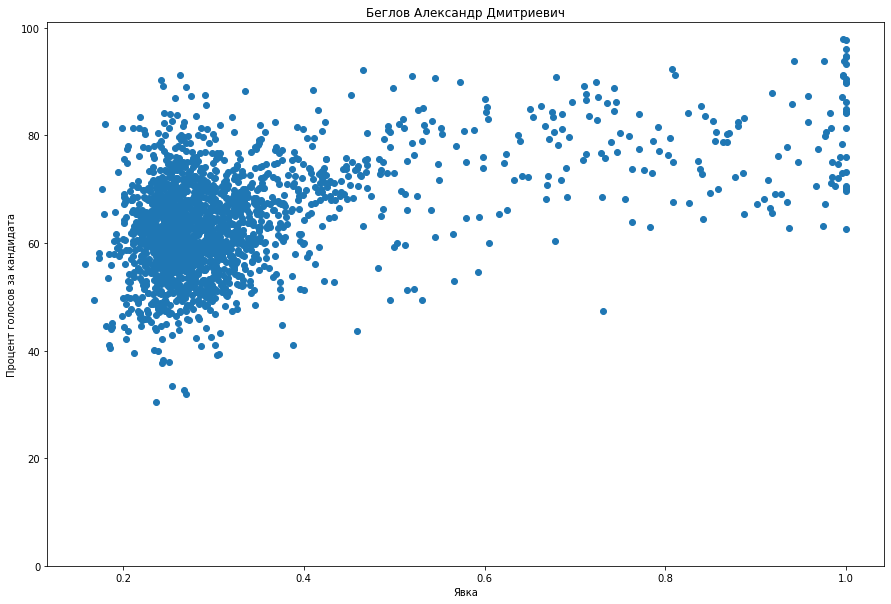

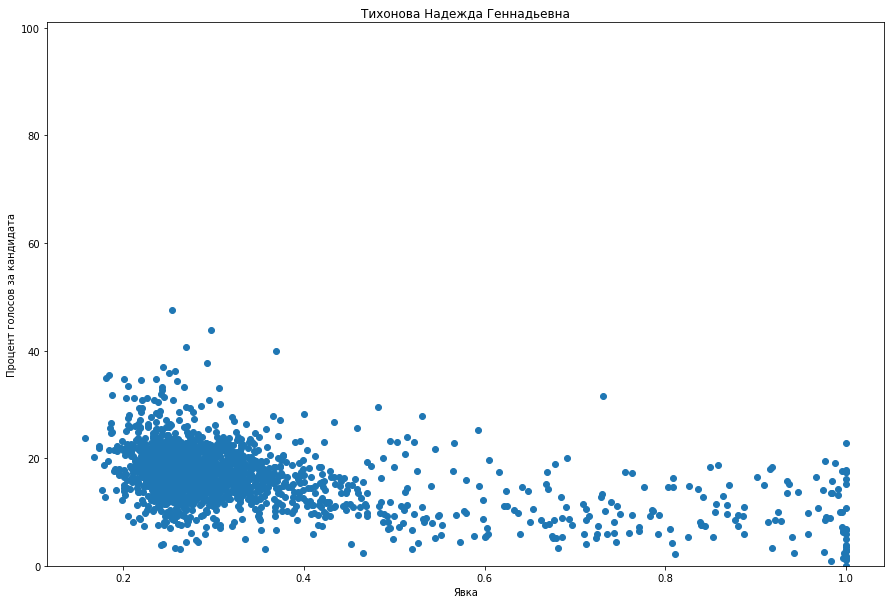

In [8]:
for candidat in candidats:
    votes_per_candidat = (df[candidat]/df['Всего голосов']).round(4) * 100

    column_name = candidat + ' результат'
    df[column_name] = votes_per_candidat
    plt.figure(figsize=(15,10))
    plt.scatter(df['Явка'], df[column_name])
    plt.title(candidat)
    plt.xlabel('Явка')
    plt.ylabel('Процент голосов за кандидата')
    plt.ylim(0, 101)